**1 Logistic regression weight update process**

1.Use the code given in listing 1 to generate data

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize coefficients
W = np.zeros(X.shape[1])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (binary cross-entropy) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip to avoid log(0)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []


2. Initializing weights as zeros, perform gradient descent based weight update for the
given data. Here, use binary cross entropy as a loss function. Further, use learning
rate as α = 0.1 and number of iterations as t = 10. Batch Gradient descent weight
update is given below

In [52]:
# Perform batch gradient descent
for epoch in range(iterations):
    # Calculate predictions using the current weights
    predictions = sigmoid(np.dot(X, W))
    
    # Compute the gradient of the loss function
    gradient = np.dot(X.T, (predictions - y)) / len(y)
    
    # Update the weights using the gradient
    W -= learning_rate * gradient
    
    # Calculate the loss and store it in the history
    loss = np.mean(log_loss(y, predictions))
    loss_history.append(loss)
    




3.Plot the loss with respect to number of iterations.

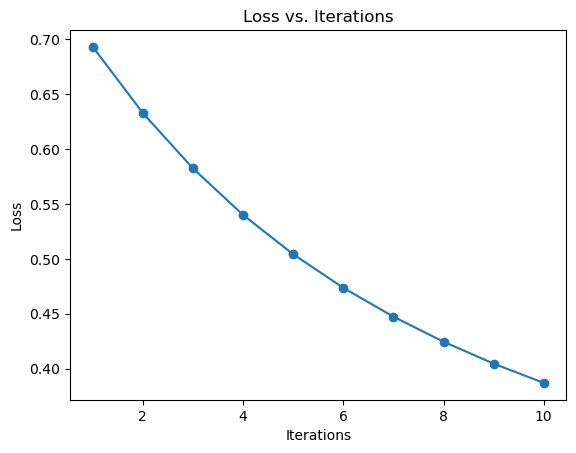

In [53]:
# Plot the loss history
import matplotlib.pyplot as plt
plt.plot(range(1, iterations + 1), np.reshape(loss_history, (iterations, 1)), marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

4. Initializing weights as zeros, perform Newton’s method weight update for the given
data. Here, use binary cross entropy as a loss function. Further, set number of
iterations as t = 10. Batch Newton’s method weight update is given below

In [54]:
# Newton's method parameters
W_newton = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 10
loss_history_n = []


# Perform Newton's method
for _ in range(iterations):
    # Calculate predicted probabilities
    y_pred = sigmoid(np.dot(X, W_newton))
    
    # Calculate the diagonal matrix S
    S = np.diag(y_pred * (1 - y_pred))

    # Calculate the gradient
    gradient = np.dot(X.T, y_pred - y) / len(y)

    # Calculate the Hessian matrix
    Hessian = np.dot(np.dot(X.T, S), X) / len(y)

    # Update the weights using Newton's method formula
    W_newton -= np.dot(np.linalg.inv(Hessian), gradient)

    # Calculate and store the loss
    loss = np.mean(log_loss(y, y_pred))
    loss_history_n.append(loss)


5.Plot the loss with respect to number of iterations.

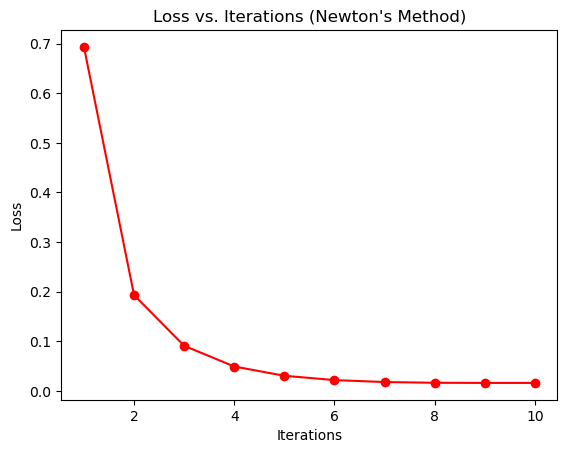

In [55]:
# Plot the loss history for Newton's method
plt.plot(range(1, iterations + 1), np.reshape(loss_history_n, (iterations, 1)), marker='o', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss vs. Iterations (Newton's Method)")
plt.show()


6.Plot the loss with respect to number of iterations for both Gradient descent and
Newton method’s in a single plot. Comment on your results

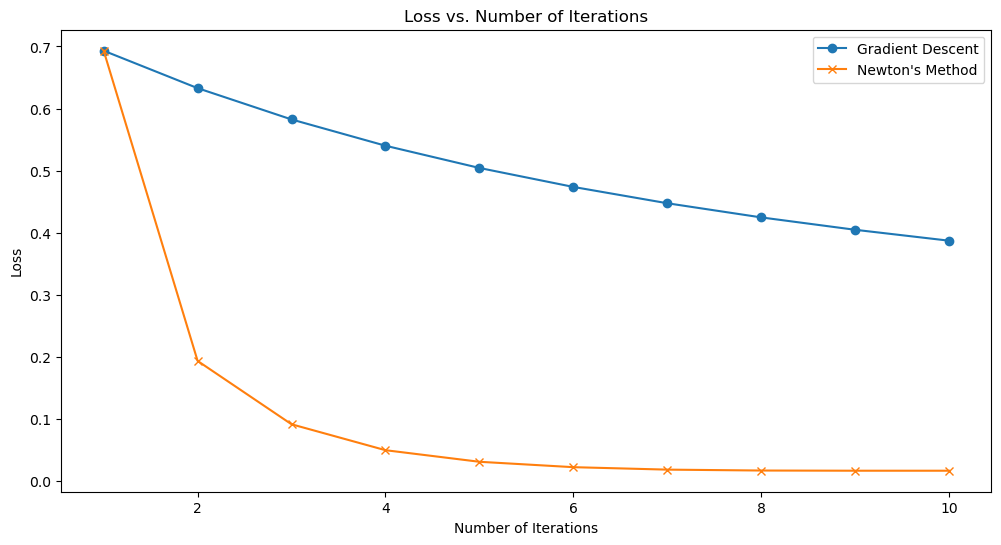

In [22]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the loss history for Gradient Descent
plt.plot(range(1, iterations + 1), np.reshape(loss_history, (iterations, 1)), label='Gradient Descent', marker='o')

# Plot the loss history for Newton's Method
plt.plot(range(1, iterations + 1), np.reshape(loss_history_n, (iterations, 1)), label="Newton's Method", marker='x')

# Add labels, legend, and title
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Number of Iterations')

# Show the plot
plt.show()


We maintain separate weight vectors and loss histories for both Gradient Descent and Newton's Method.
For each method, we perform the specified number of iterations and calculate the loss at each iteration.
Finally, we plot the loss vs. iterations for both methods on the same plot.
Please comment on the results based on the plot. You should observe how each optimization method converges to a minimum of the loss function and compare their convergence behavior and speed. Typically, Newton's method converges faster than standard gradient descent because it uses second-order information (the Hessian matrix), but it also involves more complex calculations and may not be suitable for all problems due to computational requirements.

**2 Perform grid search for hyper-parameter tuning**

1.Use the code given in listing 2 to load data.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# Data loading
train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)


c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2.Explain the purpose of "X = X[permutation]" and " y = y[permutation]"

The lines of code X = X[permutation] and y = y[permutation] are used to shuffle (permute) the rows of the X and y arrays randomly. These lines serve a specific purpose in the context of machine learning and data preprocessing:

X is typically a numpy array representing the features or input data of your machine learning model. Each row of X corresponds to one data sample, and each column represents a feature or attribute. By shuffling the rows randomly, you ensure that the order of the data samples is random. This is important because some datasets may have an inherent order or structure (e.g., samples sorted by class label), and shuffling helps prevent any biases that could be introduced during training.

y represents the corresponding labels or target values for the data samples in X. Like X, shuffling y ensures that the labels are still associated with the correct data samples after the permutation of rows. It maintains the correspondence between data samples and their labels.

By performing this shuffling step, you make sure that your training and test data will be randomly selected from the full dataset. This randomness is important to avoid any potential biases in your model's training and evaluation process. In the MNIST dataset, for example, the digits may be sorted in a particular order, so shuffling helps ensure that the training and test sets are representative of the overall distribution of digits.

3.Use lasso logistic regression for image classification as "LogisticRegression(penalty=’l1’,
solver=’liblinear’, multi_class=’auto’)". Next, create a pipeline that includes the scaling, the Lasso logistic regression estimator, and a parameter grid for hyperparameter
tuning (C value ).[Hint refer url ]


In [58]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a pipeline with scaling, Lasso logistic regression, and hyperparameter tuning
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])



4. Use GridSearchCV to perform a grid search over the range (e.g., np.logspace(-2, 2,
9)) of to find optimal value of hyperparameter C [Hint refer url ]

In [59]:
# Define the hyperparameter grid for C values
param_grid = {
    'lasso_logistic__C': np.logspace(-2, 2, 9)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_['lasso_logistic__C']
print(best_params)


0.31622776601683794


5. Plot the classification accuracy with respect to hyperparameter C. Comment on your
results.

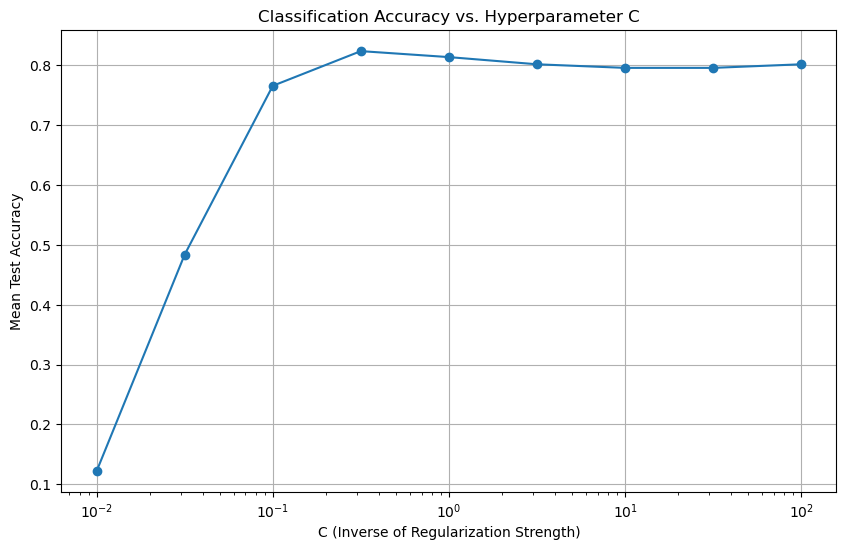

In [60]:
import matplotlib.pyplot as plt

# Get the cross-validation results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot accuracy vs. C with a logarithmic scale on the x-axis
plt.semilogx(param_grid['lasso_logistic__C'], mean_test_scores, marker='o')
plt.title('Classification Accuracy vs. Hyperparameter C')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)

# Show the plot
plt.show()


6. Calculate confusion matrix, precision, recall and F1-score. Comment on your results

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Build the final model with the best hyperparameter
final_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto', C=best_params)
final_model.fit(X_train, y_train)

# Predict on the test data
y_pred = final_model.predict(X_test)

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision_result = precision_score(y_test, y_pred, average='weighted')
recall_result = recall_score(y_test, y_pred, average='weighted')
f1_score_result = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(confusion_matrix_result)
print(f"Precision: {precision_result:.2f}")
print(f"Recall: {recall_result:.2f}")
print(f"F1-Score: {f1_score_result:.2f}")


Confusion Matrix:
[[ 5  0  0  0  0  1  1  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  9  0  0  0  0  1]
 [ 0  0  0  1  0  3  0  0  0  0]
 [ 0  0  0  0  1  0  7  0  1  0]
 [ 0  0  0  0  0  0  0 11  0  3]
 [ 0  0  0  0  0  1  0  0 11  0]
 [ 0  0  0  1  1  0  0  0  0 13]]
Precision: 0.87
Recall: 0.86
F1-Score: 0.86


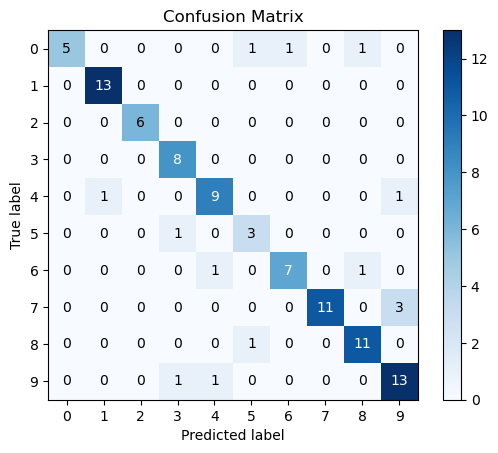

In [62]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred defined

# Plot the confusion matrix without normalization
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title('Confusion Matrix')
plt.show()


**3 Logistic regression**

Based on "James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to
statistical learning (Vol. 112, p. 18). New York: springer."
1. Consider a dataset collected from a statistics class that includes information on
students. The dataset includes variables x1 representing the number of hours
studied, x2 representing the undergraduate GPA, and y indicating whether the
student received an A+ in the class. After conducting a logistic regression analysis,
we obtained the following estimated coefficients: w0 = −6, w1 = 0.05, and w2 = 1.


(a) What is the estimated probability that a student, who has studied for 40 hours
and has an undergraduate GPA of 3.5, will receive an A + in the class?


(b) To achieve a 50% chance of receiving an A+ in the class, how many hours of
study does a student like the one in part (1a) need to complete?

In [63]:
import math

# Given coefficients and input features
w0 = -6
w1 = 0.05
w2 = 1
x1 = 40
x2 = 3.5

# Calculate the estimated probability using logistic regression
probability = 1 / (1 + math.exp(-(w0 + w1 * x1 + w2 * x2)))
print(f"The estimated probability is: {probability:.2f}")

# Calculate the required hours to achieve a 50% chance of receiving an A+
required_hours = (6 - 3.5) / 0.05
print(f"To achieve a 50% chance of receiving an A+, a student needs to study for {required_hours:.2f} hours.")


The estimated probability is: 0.38
To achieve a 50% chance of receiving an A+, a student needs to study for 50.00 hours.
